In [4]:

import numpy as np

import scoobpsf
from scoobpsf.math_module import xp, _scipy, ensure_np_array
from scoobpsf.imshows import *
import scoobpsf.dm as dm

from importlib import reload



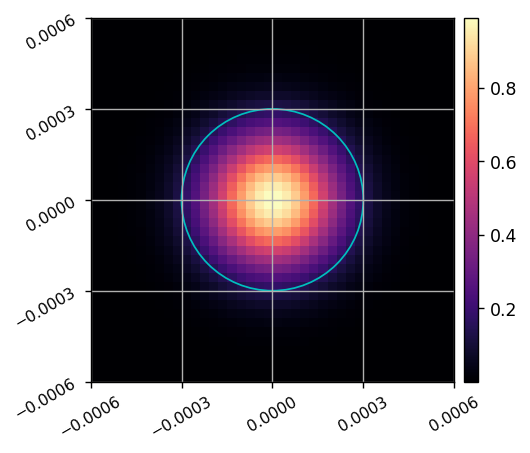

cupy.ndarray

In [12]:
reload(dm)
inf_fun, sampling = dm.make_gaussian_inf_fun(act_spacing=300e-6*u.m, sampling=10, coupling=0.15,
                         plot=True,
                         )
type(inf_fun)

In [13]:
reload(dm)
DM = dm.DeformableMirror()

Using default Gaussian influence function.
Using reflection when computing OPD.


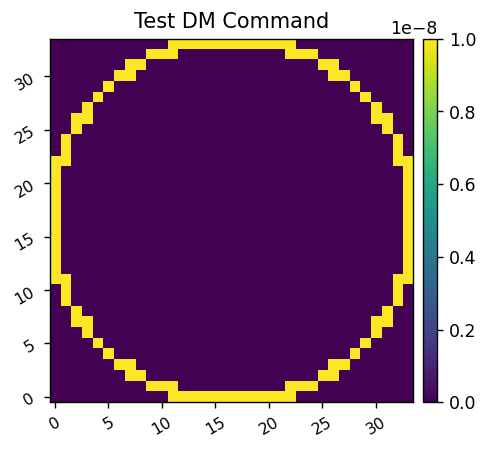

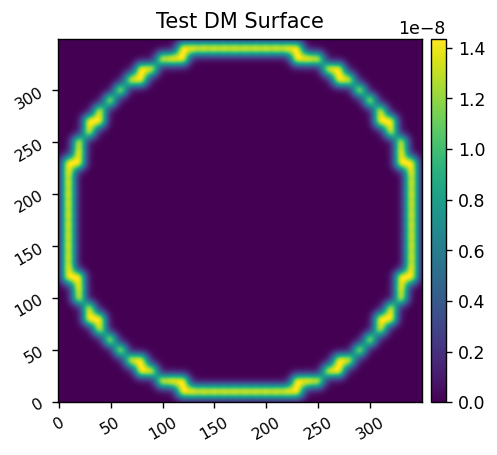

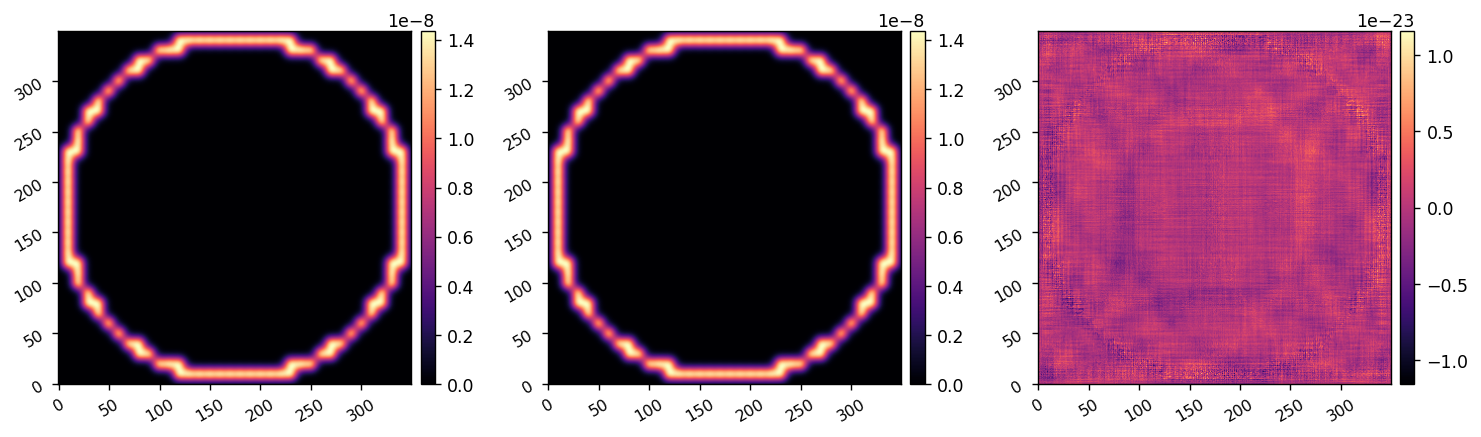

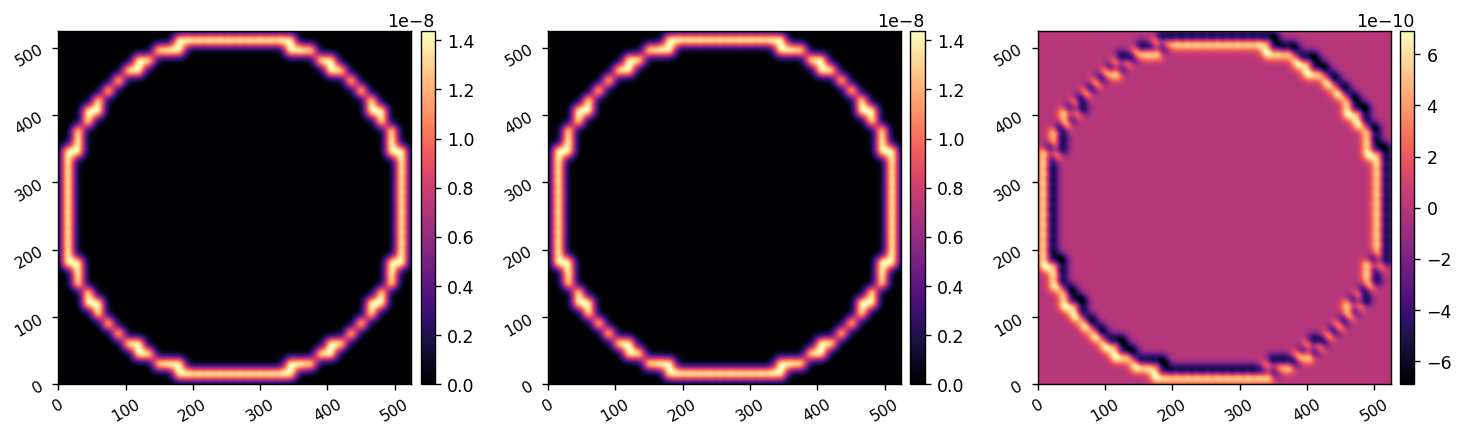

In [14]:
xx = (np.linspace(0, DM.Nact-1, DM.Nact) - DM.Nact/2 + 1/2) * DM.act_spacing.to(u.mm).value*2
x,y = np.meshgrid(xx,xx)
r = np.sqrt(x**2 + y**2)
ring_command = np.asarray((r<10.5)*(r>9.8), dtype=np.float64)
ring_command *= 1e-8
DM.command = xp.array(ring_command)
imshow1(DM.command, 'Test DM Command', cmap='viridis')

test_surf = DM.get_surface()
imshow1(test_surf, 'Test DM Surface', cmap='viridis')

imshow3(test_surf, xp.flipud(xp.fliplr(test_surf)), test_surf-xp.flipud(xp.fliplr(test_surf)) )

test_surf = DM.get_surface(pixelscale=20*u.um/u.pix)
imshow3(test_surf, xp.flipud(xp.fliplr(test_surf)), test_surf-xp.flipud(xp.fliplr(test_surf)) )


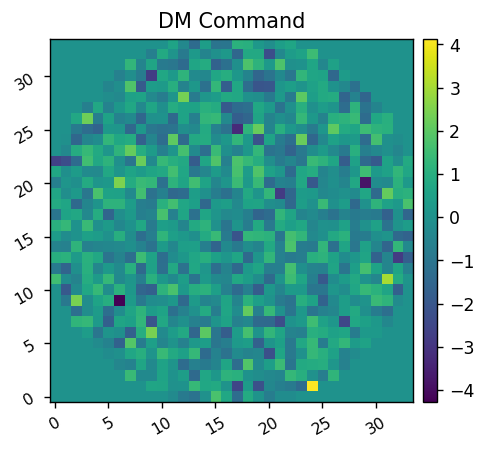

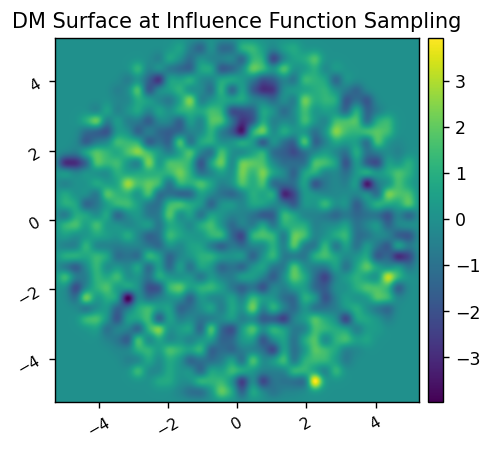

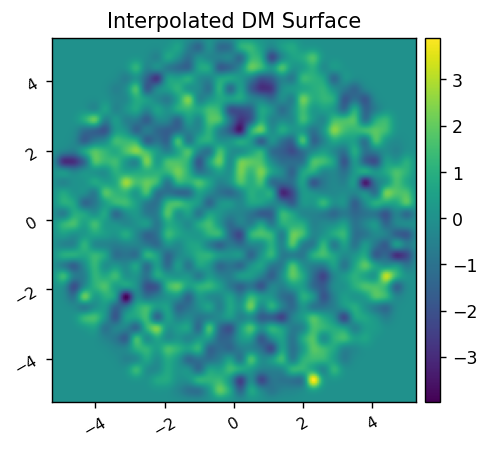

In [15]:
DM.actuators = xp.random.randn(DM.Nacts)
imshow1(DM.command, 'DM Command', cmap='viridis')

surf = DM.get_surface()
imshow1(surf, 'DM Surface at Influence Function Sampling',
        pxscl=DM.inf_pixelscale.to(u.mm/u.pix), cmap='viridis')

surf_pxscl = 50*u.um/u.pix
interpped_surf = DM.get_surface(pixelscale=surf_pxscl)
imshow1(interpped_surf, 'Interpolated DM Surface',
        pxscl=surf_pxscl.to(u.mm/u.pix), cmap='viridis')